# Start learning some new features

Learning data Structures
- Refers:  https://gregreda.com/2013/10/26/intro-to-pandas-data-structures/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', 50)


## Series and DataFrame

### Series is a one-dimensional object, similar a array/list ou column table

In [13]:
s = pd.Series([7,'Just',3.14,-416546,'hey'])
s

0          7
1       Just
2       3.14
3    -416546
4        hey
dtype: object

In [14]:
#Especify a index
s = pd.Series([7,'Just',3.14,-416546,'hey'],
              index=[ 'a ', 'b','c', 'd', 'e'])
s

a           7
b        Just
c        3.14
d     -416546
e         hey
dtype: object

In [15]:
# Take a dictonary to a um series
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              NaN
dtype: float64

In [20]:
# index to specify
cities['Chicago']
cities[['Chicago', 'Austin']]


Chicago    1000.0
Austin      450.0
dtype: float64

In [22]:
# booleon to indexing for selection
cities[cities < 1000]

Portland    900.0
Austin      450.0
dtype: float64

In [27]:
# Return a serie of true or false
less_than_1000 = cities < 1000
print(less_than_1000)
print('\n')
# an here i apply in a series
print(cities[less_than_1000])


Chicago          False
New York         False
Portland          True
San Francisco    False
Austin            True
Boston           False
dtype: bool


Portland    900.0
Austin      450.0
dtype: float64


In [37]:
print('Old value',cities['Chicago'])
cities['Chicago'] = 1400
print('New value',cities['Chicago'], '\n')
# using value boolean 
print(cities[cities < 1000], '\n')
cities[cities < 1000] = 750
print('changes values' ,cities,'\n')
print(cities[cities < 1000])


Old value 1400.0
New value 1400.0 

Portland    750.0
Austin      750.0
dtype: float64 

changes values Chicago          1400.0
New York         1300.0
Portland          750.0
San Francisco    1100.0
Austin            750.0
Boston              NaN
dtype: float64 

Portland    750.0
Austin      750.0
dtype: float64


In [39]:
# use idiomattic python to check if a ittem in a series
print('Seattle' in cities)
print('Chicago' in cities)

False
True


In [46]:
# Mathematical operations

cities / 3


Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
Austin           250.000000
Boston                  NaN
dtype: float64

In [47]:
print(np.square(cities))

Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
Austin            562500.0
Boston                 NaN
dtype: float64


In [48]:
# union of series == Occurring on the shared index values, but values series did not share an index and will produce a NULL/NaN
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


In [55]:
cities.notnull(),cities.notnull

(Chicago           True
 New York          True
 Portland          True
 San Francisco     True
 Austin            True
 Boston           False
 dtype: bool,
 <bound method Series.notnull of Chicago          1400.0
 New York         1300.0
 Portland          750.0
 San Francisco    1100.0
 Austin            750.0
 Boston              NaN
 dtype: float64>)

### DataFrame is a tabular data structure comprised of rows and columns

In [56]:
# To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
#use columns i can force a order, by default df use a order alphabetically
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


#### csv

In [ ]:
from_csv = pd.read_csv('mariano-rivera.csv')
from_csv

In [65]:
cols = ['num', 'game', 'date', 'team', 'home_away', 'opponent',
        'result', 'quarter', 'distance', 'receiver', 'score_before',
        'score_after']
no_headers = pd.read_csv('peyton-passing-TDs-2012.csv', sep=',', header=None,
                         names=cols)
no_headers.head()

,num,game,date,team,home_away,opponent,result,quarter,distance,receiver,score_before,score_after
0,1,1,2012-09-09,DEN,NaN,PIT,W 31-19,3,71,Demaryius Thomas,Trail 7-13,Lead 14-13*
1,2,1,2012-09-09,DEN,NaN,PIT,W 31-19,4,1,Jacob Tamme,Trail 14-19,Lead 22-19*
2,3,2,2012-09-17,DEN,@,ATL,L 21-27,2,17,Demaryius Thomas,Trail 0-20,Trail 7-20
3,4,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,38,Brandon Stokley,Trail 11-31,Trail 18-31
4,5,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,6,Joel Dreessen,Trail 18-31,Trail 25-31


#### Database

In [ ]:
from pandas.io import sql
import sqlite3

conn = sqlite3.connect('/Users/gjreda/Dropbox/gregreda.com/_code/towed')
query = "SELECT * FROM towed WHERE make = 'FORD';"

results = sql.read_sql(query, con=conn)
results.head()

#### URL

In [67]:
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'

# fetch the text from the URL and read it into a DataFrame
from_url = pd.read_table(url, sep='\t')
from_url.head(3)

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,$10,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,$9,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,$9.50.,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925


# Working with DataFrames

#### Dataframe

In [72]:
# pass in column names for each CSV
u_cols = ['user_id','age','sex','occupation',
        'zip_code']
users = pd.read_csv('ml-100k/u.user',sep='|', names=u_cols, encoding='latin-1')

r_cols = ['user_id','movie_id','rating','unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')
m_cols = ['movie_id','title','release_date','video_release_date','imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|',names=m_cols , usecols=range(5), encoding='latin-1')

In [73]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   imdb_url            1679 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


In [75]:
# see datatype for each column
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [ ]:
# seeing basic statics about the dataset
movies.describe()

In [76]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [77]:
movies[20:22]

,movie_id,title,release_date,video_release_date,imdb_url
20,21,Muppet Treasure Island (1996),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Muppet%20Trea...
21,22,Braveheart (1995),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Braveheart%20...


#### Selecting

In [78]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [80]:
# mutiple columns
print(users[['age', 'zip_code']].head(), '\n')
# or u can use a variable to use later
columns_you_want = ['occupation', 'sex'] 
print(users[columns_you_want].head())

   age zip_code
0   24    85711
1   53    94043
2   23    32067
3   24    43537
4   33    15213 

   occupation sex
0  technician   M
1       other   F
2      writer   M
3  technician   M
4       other   F


In [81]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [88]:
#Row selection can be done multiple ways, but doing so by an individual index or boolean indexing are typically easiest.
print(users[users.age > 25].head(3), '\n')
print(users[(users.age == 40) & (users.sex== 'M')].head(3), '\n')
print(users[(users.sex== 'F')| (users.age <30)].head(3), '\n')

   user_id  age sex occupation zip_code
1        2   53   F      other    94043
4        5   33   F      other    15213
5        6   42   M  executive    98101 

     user_id  age sex  occupation zip_code
18        19   40   M   librarian    02138
82        83   40   M       other    44133
115      116   40   M  healthcare    97232 

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067 



In [101]:
# set_index
print(' antes \n',users.head(),' \n\n depois, user_id é o novo index do dataframe')
with_new_index = users.set_index('user_id')
print(with_new_index.head())

 antes 
    user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213  

 depois, user_id é o novo index do dataframe
         age sex  occupation zip_code
user_id                              
1         24   M  technician    85711
2         53   F       other    94043
3         23   M      writer    32067
4         24   M  technician    43537
5         33   F       other    15213


In [103]:
# select any row
print(users.iloc[99],'\n')

user_id             100
age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 99, dtype: object 



In [105]:
print(users.loc[100],'\n')

user_id           101
age                15
sex                 M
occupation    student
zip_code        05146
Name: 100, dtype: object 



The simplified rules of indexing are - Use loc for label-based indexing - Use iloc for positional indexing

#### Joining - we'll often need to merge/join datasets as data is typically stored in a relational manner.

- Like SQL's JOIN clause, pandas.merge allows two DataFrames to be joined on one or more keys. 
- The function provides a series of parameters (on, left_on, right_on, left_index, right_index) allowing you to specify the columns or indexes on which to join.

In [ ]:
# From the funcion docstring
# how : {'left', 'right', 'outer', 'inner'}, default 'inner' 
# - left: use only keys from left frame (SQL: left outer join) 
# - right: use only keys from right frame (SQL: right outer join) 
# - outer: use union of keys from both frames (SQL: full outer join) 
# - inner: use intersection of keys from both frames (SQL: inner join)

In [106]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


##### inner join (default)

In [108]:
pd.merge(left_frame,right_frame , on = 'key',how= 'inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


* Sql equivalent

    `````sql
    SELECT left_frame.key, left_frame.left_value, right_frame.right_value
    FROM left_frame
    INNER JOIN right_frame
        ON left_frame.key = right_frame.key;
    `````

In [110]:
pd.merge(left_frame, right_frame, left_on='key', right_index=True)


,key,key_x,left_value,key_y,right_value
0,0,0,a,2,f
1,1,1,b,3,g
2,2,2,c,4,h
3,3,3,d,5,i
4,4,4,e,6,j


##### left out join

In [113]:
pd.merge(left_frame, right_frame, on='key', how='left')
# We keep everything from the left frame, pulling in the value from the right frame where the keys match up. 
#  The right_value is NULL where keys do not match (NaN).

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


* Sql equivalent

    `````sql
    SELECT left_frame.key, left_frame.left_value, right_frame.right_value
    FROM left_frame
    LEFT JOIN right_frame
        ON left_frame.key = right_frame.key;
    `````

##### right outer join

In [111]:
pd.merge(left_frame, right_frame, on='key', how='right')
#This time we've kept everything from the right frame with the left_value being NULL where the right frame's key did not find a match.

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


* Sql equivalent

    `````sql
    SELECT right_frame.key, left_frame.left_value, right_frame.right_value
    FROM left_frame
    RIGHT JOIN right_frame
        ON left_frame.key = right_frame.key;
    `````

##### full outer join

In [114]:
pd.merge(left_frame, right_frame, on='key', how='outer')
# We've kept everything from both frames, regardless of whether or not there was a match on both sides. 
# Where there was not a match, the values corresponding to that key are NULL.

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


* Sql equivalent

    `````sql
    SELECT IFNULL(left_frame.key, right_frame.key) key
        , left_frame.left_value, right_frame.right_value
    FROM left_frame
    FULL OUTER JOIN right_frame
        ON left_frame.key = right_frame.key;
    `````

##### combining - pandas also provides a way to combine DataFrames along an axis - pandas.concat. While the function is equivalent to SQL's UNION clause, there's a lot more that can be done with it.
- series or dataframes and retrns a series or dataframe of tthe concatenated objects

In [117]:
pd.concat([left_frame, right_frame])


,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [118]:
pd.concat([left_frame, right_frame], axis=1)
#objects can be concatentated side-by-side using the function's axis parameter.

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


##### Grouping 

In [33]:
headers = ['name','title','department','salary']
chicago = pd.read_csv('city-of-chicago-salaries.csv',
                      header=0,
                      names=headers,
                      converters={'salary': lambda x: float(x.replace('$',''))})
chicago.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440.0


In [5]:
# how can i grouping some things:
# use a function of pandas groupby
by_dept = chicago.groupby('department')
by_dept

In [14]:
# using count return the total number 
#not null record within each column and total records for each department
print(by_dept.count().head(),'\n\n', by_dept.size().tail())

                   name  title  salary
department                            
ADMIN HEARNG         42     42      42
ANIMAL CONTRL        61     61      61
AVIATION           1218   1218    1218
BOARD OF ELECTION   110    110     110
BOARD OF ETHICS       9      9       9 

 department
PUBLIC LIBRARY     926
STREETS & SAN     2070
TRANSPORTN        1168
TREASURER           25
WATER MGMNT       1857
dtype: int64


In [25]:

print(by_dept['salary'].mean()[20:25]) # average salary of each department
print('\n')
print(by_dept['salary'].median()[20:25]) # take that, RDBMS!
print('\n')
print(by_dept['salary'].mean()[20:25]) # average salary of each department

department
HUMAN RESOURCES      71337.176471
INSPECTOR GEN        80703.000000
IPRA                 82425.035294
LAW                  70853.156000
LICENSE APPL COMM    65436.000000
Name: salary, dtype: float64


department
HUMAN RESOURCES      68496.0
INSPECTOR GEN        76116.0
IPRA                 82524.0
LAW                  66492.0
LICENSE APPL COMM    65436.0
Name: salary, dtype: float64


department
HUMAN RESOURCES      71337.176471
INSPECTOR GEN        80703.000000
IPRA                 82425.035294
LAW                  70853.156000
LICENSE APPL COMM    65436.000000
Name: salary, dtype: float64


* Sql equivalent
- Operation can also be done on an individual series within a grouped object

    `````sql
    SELECT department, COUNT(DISTINCT title)
    FROM chicago
    GROUP BY department
    ORDER BY 2 DESC
    LIMIT 5;
    `````

In [26]:
by_dept.title.nunique().sort_values(ascending=False)[:5]

department
WATER MGMNT    153
TRANSPORTN     150
POLICE         130
AVIATION       125
HEALTH         118
Name: title, dtype: int64

##### Split-apply-combine

* Sql equivalent
    - What if we wanted to see the highest paid employee within each department
````sql
SELECT *
FROM chicago c
INNER JOIN (
    SELECT department, max(salary) max_salary
    FROM chicago
    GROUP BY department
) m
ON c.department = m.department
AND c.salary = m.max_salary;
```

In [ ]:
def ranker(df):
    """Assigns a rank to each employee based on salary, with 1 being the highest paid.
    Assumes the data is DESC sorted."""
    df['dept_rank'] = np.arange(len(df)) + 1
    return df
chicago.sort_values('salary', ascending=False, inplace=True)
chicago = chicago.groupby('department').apply(ranker) # this a deprecate function
print(chicago[chicago.dept_rank == 1].head(7))

                                           name  \
department                                        
ADMIN HEARNG      13270    JACKOWIAK,  PATRICIA   
ANIMAL CONTRL     405         ALFRED,  SANDRA L   
AVIATION          763    ANDOLINO,  ROSEMARIE S   
BOARD OF ELECTION 1632     BATEMAN,  KELLY ANNE   
BOARD OF ETHICS   1982          BERLIN,  STEVEN   
BUDGET & MGMT     12635      HOLT,  ALEXANDRA D   
BUILDINGS         18861    MERCHANT,  MICHAEL R   

                                                            title  \
department                                                          
ADMIN HEARNG      13270            DIR OF ADMINISTRATIVE HEARINGS   
ANIMAL CONTRL     405    EXECUTIVE DIR OF ANIMAL CARE AND CONTROL   
AVIATION          763                    COMMISSIONER OF AVIATION   
BOARD OF ELECTION 1632        DEPUTY CHIEF ADMINISTRATIVE OFFICER   
BOARD OF ETHICS   1982            EXECUTIVE DIR - BOARD OF ETHICS   
BUDGET & MGMT     12635                                BU

C:\Users\Luis\AppData\Local\Temp\ipykernel_12060\4028553870.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  chicago = chicago.groupby('department').apply(ranker)


# Pandas on the MovieLens dataset

In [49]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)


##### What are the 25 most rated movies?


In [50]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]

most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)

* Sql equivalent
```sql
    SELECT title,count(1)
    FROM Lens
    GROUP BY title
    ORDER BY 2 DESC
    LIMIT 25; 
```

In [51]:
# another way 
lens.title.value_counts()[:25]

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)

##### Wich movies are most highly rated?

In [52]:
movies_stats = lens.groupby('title').agg({'rating':[np.size,np.mean]})
movies_stats

# we can use the agg method to pass a dictionary specifying the columns to
# agregate( as keys) and a list of functions we'd like to apply

C:\Users\Luis\AppData\Local\Temp\ipykernel_9960\862372893.py:1: FutureWarning: The provided callable <function mean at 0x0000025705C04CC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  movies_stats = lens.groupby('title').agg({'rating':[np.size,np.mean]})


rating          
                                        size      mean
title                                                 
'Til There Was You (1997)                  9  2.333333
1-900 (1994)                               5  2.600000
101 Dalmatians (1996)                    109  2.908257
12 Angry Men (1957)                      125  4.344000
187 (1997)                                41  3.024390
...                                      ...       ...
Young Guns II (1990)                      44  2.772727
Young Poisoner's Handbook, The (1995)     41  3.341463
Zeus and Roxanne (1997)                    6  2.166667
unknown                                    9  3.444444
Á köldum klaka (Cold Fever) (1994)         1  3.000000

[1664 rows x 2 columns]

In [53]:
movies_stats.sort_values([('rating', 'mean')], ascending=False).head()
# a unrealist results


rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [54]:
# movies tha have been rated at least 100 times
atleast_100 = movies_stats['rating']['size'] >= 100
movies_stats[atleast_100].sort_values([('rating','mean')],ascending = False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

##### Limiting our population going forward

In [55]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

```sql
 CREATE TABLE most_50 AS (
    SELECT movie_id, COUNT(1)
    FROM lens
    GROUP BY movie_id
    ORDER BY 2 DESC
    LIMIT 50
);
```

##### Which movies are mostt controversial amongst different ages?


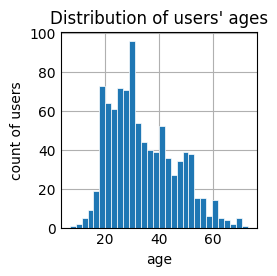

In [56]:
users.age.plot.hist(bins=30,linewidth=0.5, edgecolor="white")
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')
plt.show()

##### Binning our users

In [57]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0,81,10),right= False,labels=labels)
lens[['age','age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
1,21,20-29
2,33,30-39
3,30,30-39
4,23,20-29
6,29,20-29
7,26,20-29
8,31,30-39
9,24,20-29
10,32,30-39


In [58]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})


C:\Users\Luis\AppData\Local\Temp\ipykernel_9960\2490309688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lens.groupby('age_group').agg({'rating': [np.size, np.mean]})
C:\Users\Luis\AppData\Local\Temp\ipykernel_9960\2490309688.py:1: FutureWarning: The provided callable <function mean at 0x0000025705C04CC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  lens.groupby('age_group').agg({'rating': [np.size, np.mean]})


rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

In [59]:
lens.set_index('movie_id', inplace=True)
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

C:\Users\Luis\AppData\Local\Temp\ipykernel_9960\2004198042.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])


title                 age_group
Air Force One (1997)  0-9               NaN
                      10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          0-9               NaN
                      10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
Name: rating, dtype: float64

In [60]:
by_age.rating.mean().unstack(1).fillna(0)[10:20]
#unstack, well, unstacks the specified level of a MultiIndex 
# (by default, groupby turns the grouped field into an index - since we grouped by two fields, it became a MultiIndex). 
# We unstacked the second index (remember that Python uses 0-based indexes), and then filled in NULL values with 0.

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


In [61]:
by_age.rating.mean().unstack(0).fillna(0)


title,Air Force One (1997),Alien (1979),Aliens (1986),Amadeus (1984),Back to the Future (1985),"Birdcage, The (1996)",Braveheart (1995),Conspiracy Theory (1997),Contact (1997),Dead Man Walking (1995),E.T. the Extra-Terrestrial (1982),"Empire Strikes Back, The (1980)","English Patient, The (1996)",Fargo (1996),Forrest Gump (1994),"Fugitive, The (1993)","Full Monty, The (1997)","Godfather, The (1972)",Groundhog Day (1993),Independence Day (ID4) (1996),Indiana Jones and the Last Crusade (1989),Jaws (1975),Jerry Maguire (1996),L.A. Confidential (1997),Leaving Las Vegas (1995),Liar Liar (1997),Men in Black (1997),Mission: Impossible (1996),Monty Python and the Holy Grail (1974),Mr. Holland's Opus (1995),"Princess Bride, The (1987)",Pulp Fiction (1994),Raiders of the Lost Ark (1981),Return of the Jedi (1983),"Rock, The (1996)","Saint, The (1997)",Schindler's List (1993),Scream (1996),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Trek: First Contact (1996),Star Wars (1977),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),Twelve Monkeys (1995),Twister (1996),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971)
age_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0-9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,5.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000
10-19,3.647059,4.111111,4.050000,4.250000,4.037037,3.217391,4.384615,3.565217,3.693878,3.647059,3.680000,4.642857,3.739130,3.937500,4.047619,4.320000,3.421053,4.400000,3.476190,3.595238,4.130435,3.863636,3.928571,4.363636,4.000000,3.191489,3.900000,3.441176,4.285714,3.814815,4.214286,4.031250,4.250000,4.488372,4.058824,3.342857,4.26087,3.784615,4.666667,4.095238,3.576923,4.630435,4.173913,3.619048,4.611111,3.621622,3.916667,3.000000,3.500000,3.387097
20-29,3.666667,4.026087,4.087719,4.067308,3.720588,3.413223,4.194915,3.382114,3.785714,3.926606,3.609091,4.311688,3.571429,4.010471,3.785714,3.969925,4.056818,4.345070,3.798246,3.291429,3.944056,3.870000,3.793548,4.096154,3.773913,3.321244,3.705426,3.378378,4.154412,3.849057,4.335714,4.197605,4.269939,4.067308,3.690476,3.179688,4.46789,3.669767,4.585366,4.434211,3.641975,4.413043,3.969466,3.875969,4.336066,3.920635,3.847458,3.200000,4.000000,3.820144
30-39,3.570000,4.103448,3.887640,4.236842,3.915789,3.514286,4.156627,3.419355,3.847458,3.814286,3.806818,4.052083,3.621849,4.230769,3.861702,3.981481,3.933333,4.412844,3.786667,3.389381,3.797619,3.648352,3.708333,4.089552,3.506024,3.080645,3.681818,3.180723,4.094737,3.693333,4.155556,4.074766,4.338983,3.805970,3.625000,3.068493,4.47561,3.250000,4.323944,4.214876,3.737864,4.305732,3.977011,4.105882,4.236111,4.033058,3.788462,3.133333,3.882353,3.908046
40-49,3.555556,3.833333,3.526316,4.081633,4.036364,3.500000,4.051282,3.465116,3.866667,3.754386,4.160000,4.100000,3.634615,4.294118,3.847826,4.190476,3.714286,3.929412,3.851064,3.718750,3.980000,3.725000,3.407407,4.220000,3.568627,2.916667,3.625000,3.346154,3.717949,3.875000,3.878049,3.936170,4.173913,4.000000,3.673469,3.078431,4.50000,2.774194,4.378378,4.133333,3.760000,4.166667,4.212121,3.975610,3.984848,3.700000,3.653846,3.479167,3.825000,3.058824
50-59,3.750000,4.272727,4.235294,4.230769,3.500000,3.346154,3.956522,3.538462,3.739130,4.294118,4.368421,3.909091,3.774648,4.442308,4.000000,4.240000,4.146341,4.463415,3.571429,3.888889,4.043478,3.956522,3.692308,4.261905,4.000000,3.000000,4.150000,3.125000,3.800000,3.551724,3.809524,3.500000,4.000000,4.000000,3.625000,2.750000,4.62963,3.000000,4.185185,4.300000,3.272727,4.469388,3.941176,3.900000,4.210526,3.758621,3.650000,3.300000,3.904762,2.85714

##### Which movies do men and women mostt disagree on?

In [62]:
lens.reset_index('movie_id', inplace=True)
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [63]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


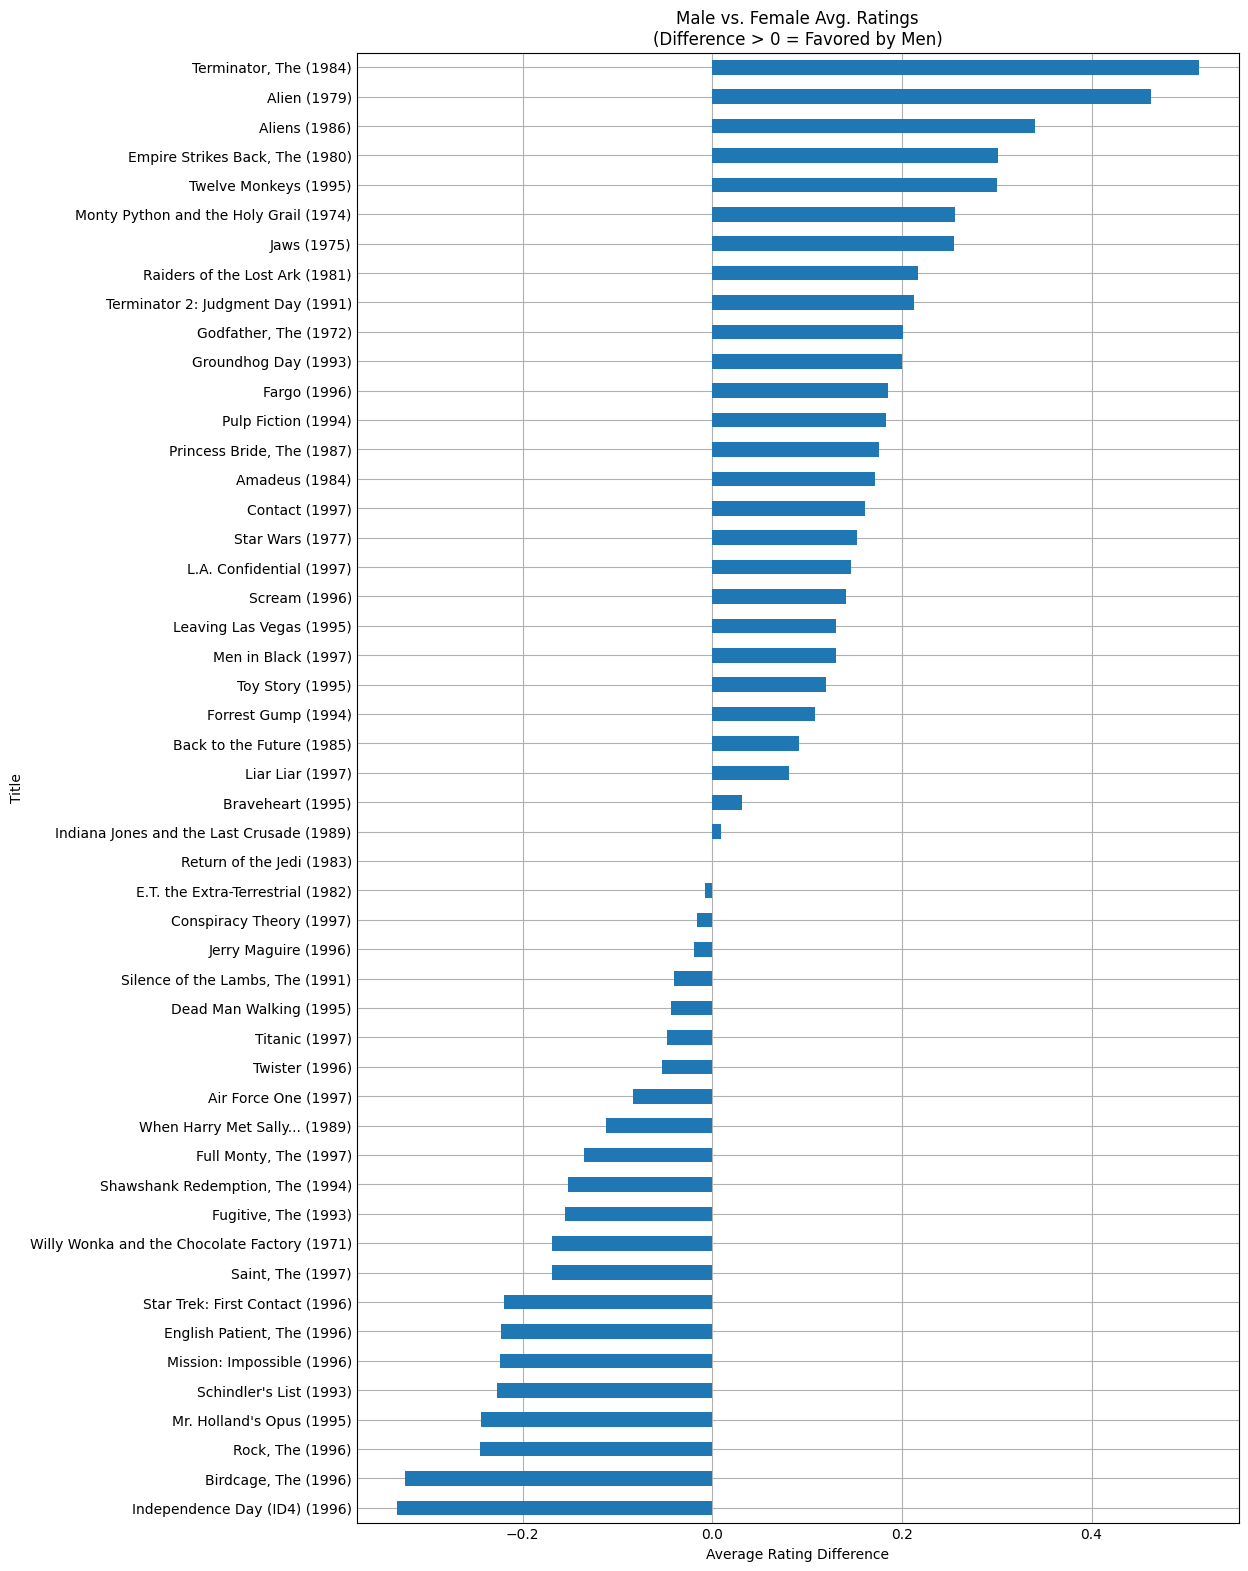

In [64]:
pivoted.reset_index('movie_id', inplace=True)
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');